In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
cars = pd.read_csv('../Data/cleaned_data_updated.csv') # read clean data

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           3211 non-null   int64 
 1   brand           3211 non-null   object
 2   model           3211 non-null   object
 3   year            3211 non-null   int64 
 4   condition       3211 non-null   object
 5   transmission    3211 non-null   object
 6   fuel_type       3210 non-null   object
 7   kilometers_run  3211 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 200.8+ KB


In [87]:
cars.head()

,price,brand,model,year,condition,transmission,fuel_type,kilometers_run
0,2450000,toyota,fielder,2020,reconditioned,automatic,hybrid,86000
1,4500000,toyota,noah,2020,reconditioned,automatic,octane,68000
2,2750000,honda,cr-v,2012,used,automatic,octane,92000
3,1800000,toyota,hilux,2009,used,manual,diesel,1
4,1350000,toyota,passo,2010,used,automatic,"octane, lpg",87369


In [88]:
numeric_cols = ['price','year','kilometers_run']
categorical_cols = ['brand','model','condition','transmission','fuel_type']

In [89]:
for col in numeric_cols:
    cars[col] = pd.to_numeric(cars[col],errors='coerce')
    
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

In [90]:
cars.isnull().sum()

price             0
brand             0
model             0
year              0
condition         0
transmission      0
fuel_type         1
kilometers_run    0
dtype: int64

In [ ]:
current_year = 2025
cars['age'] = current_year - cars['year'] # calculate car age

cars['km_per_year'] = cars['kilometers_run'] / cars['age'].replace(0,np.nan) # calculate km/year

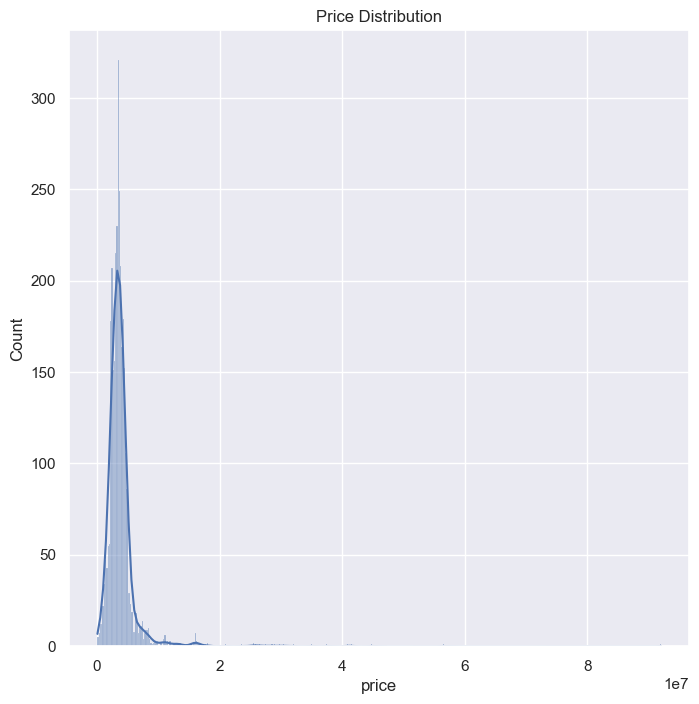

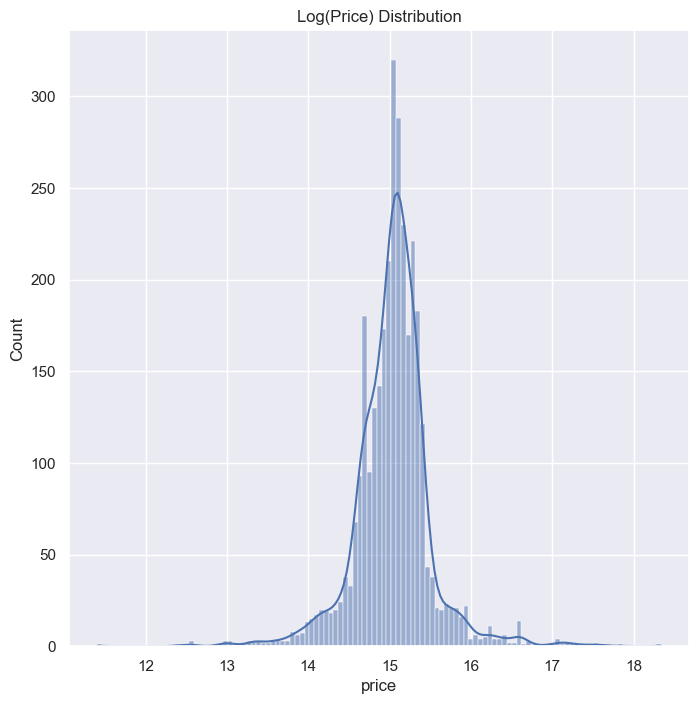

In [102]:
plt.figure(figsize=(8,8))
sns.histplot(cars['price'], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(8,8))
sns.histplot(np.log1p(cars['price']), kde=True)
plt.title("Log(Price) Distribution")
plt.show()

In [93]:
numeric_cols = ['price','year','kilometers_run', 'age', 'km_per_year']

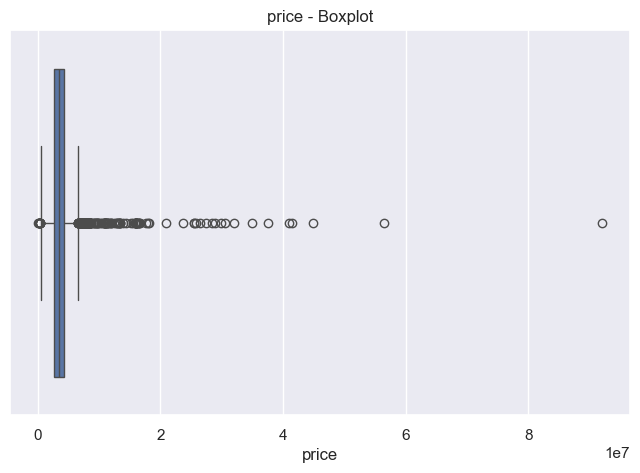


--- price Summary ---
count    3.211000e+03
mean     3.892738e+06
std      3.286193e+06
min      9.000000e+04
25%      2.742500e+06
50%      3.480000e+06
75%      4.260000e+06
max      9.200000e+07
Name: price, dtype: float64


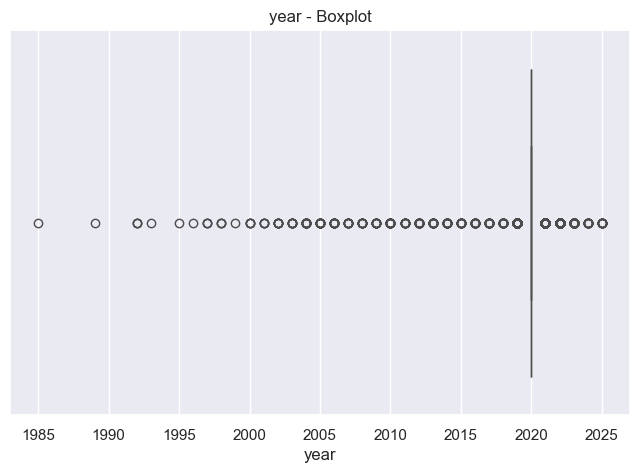


--- year Summary ---
count    3211.000000
mean     2019.206789
std         3.823061
min      1985.000000
25%      2020.000000
50%      2020.000000
75%      2020.000000
max      2025.000000
Name: year, dtype: float64


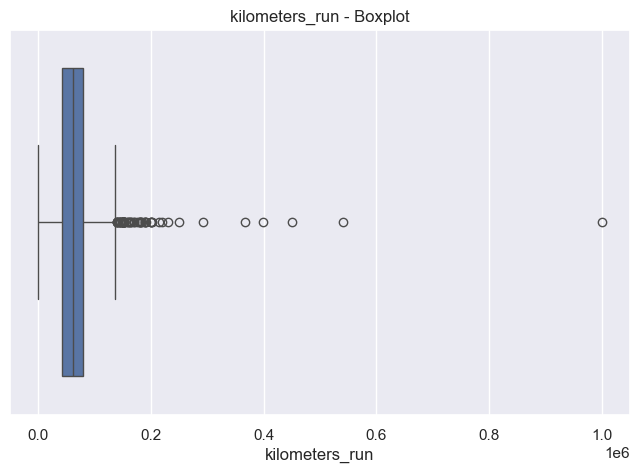


--- kilometers_run Summary ---
count       3211.000000
mean       62703.850514
std        37154.365655
min            0.000000
25%        42000.000000
50%        61000.000000
75%        80000.000000
max      1000000.000000
Name: kilometers_run, dtype: float64


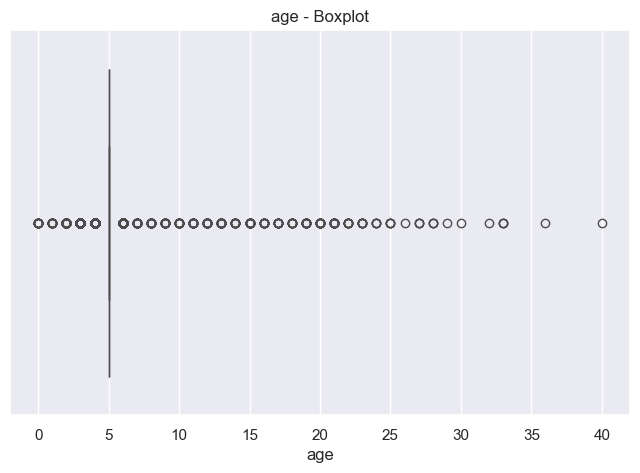


--- age Summary ---
count    3211.000000
mean        5.793211
std         3.823061
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        40.000000
Name: age, dtype: float64


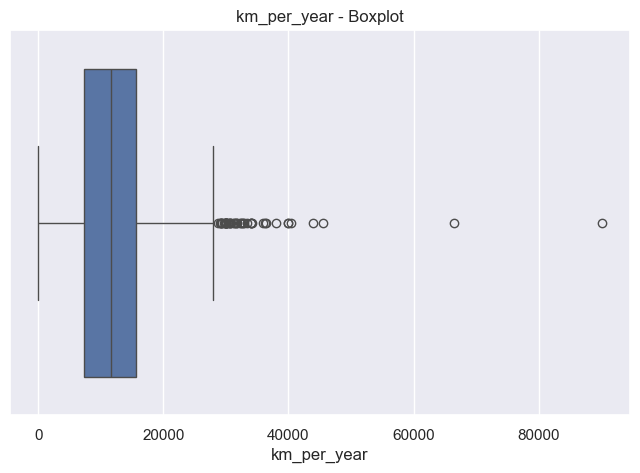


--- km_per_year Summary ---
count     3195.000000
mean     12066.690649
std       6326.136827
min          0.062500
25%       7400.000000
50%      11666.666667
75%      15669.100000
max      90078.400000
Name: km_per_year, dtype: float64


In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=cars[col])
    plt.title(f"{col} - Boxplot")
    plt.show()
    print(f"\n--- {col} Summary ---")
    print(cars[col].describe())

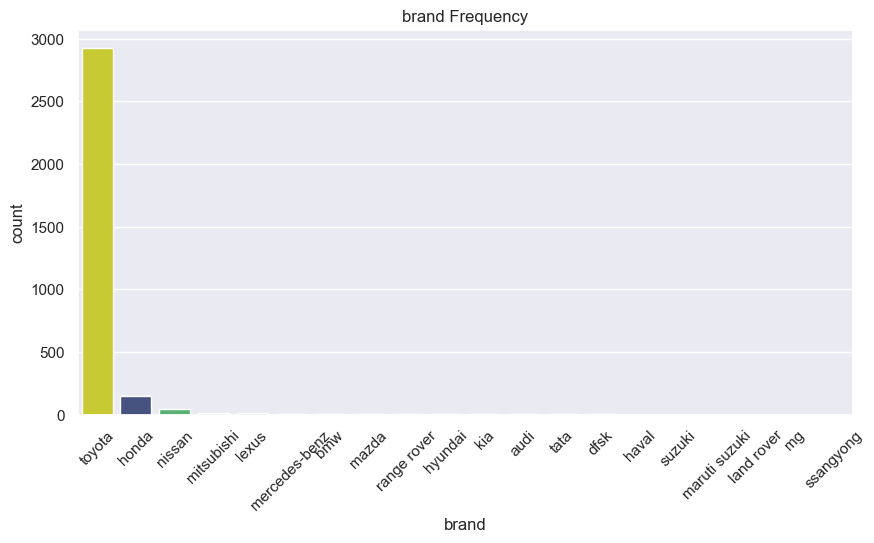

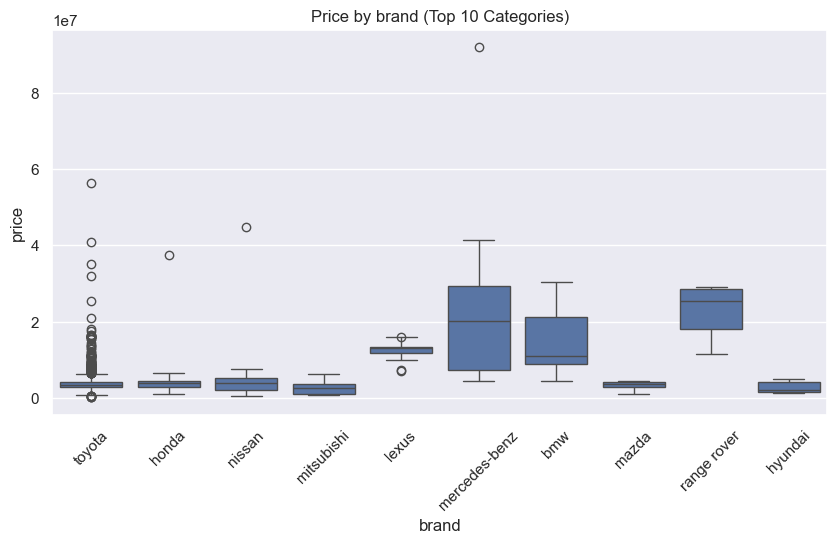

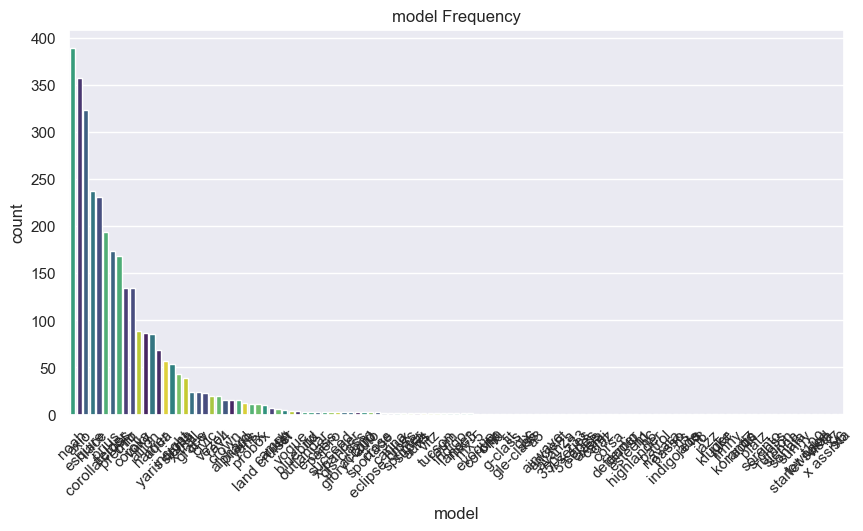

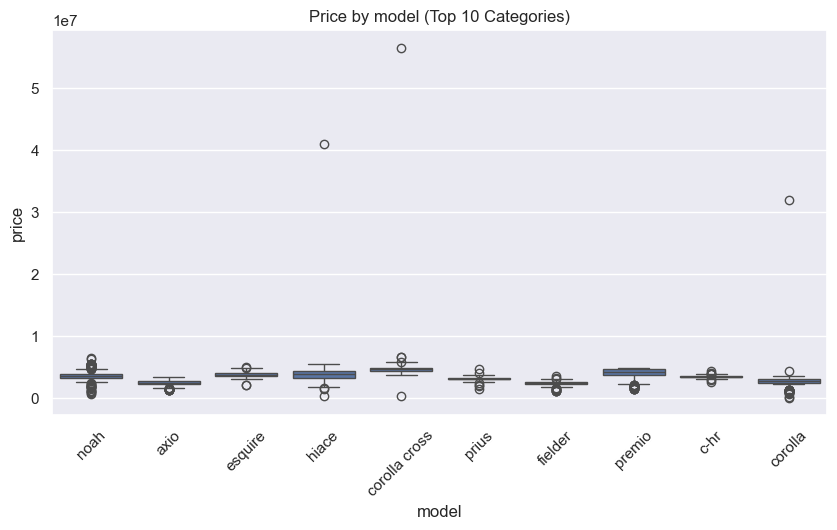

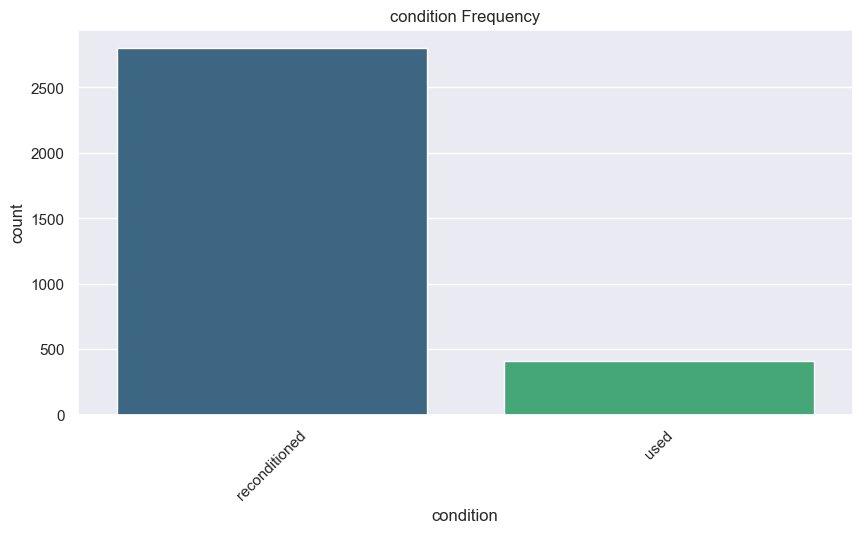

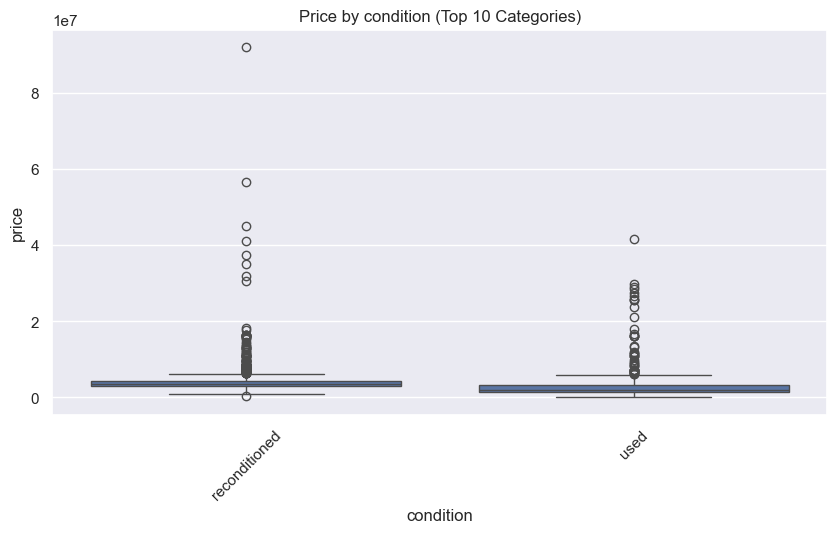

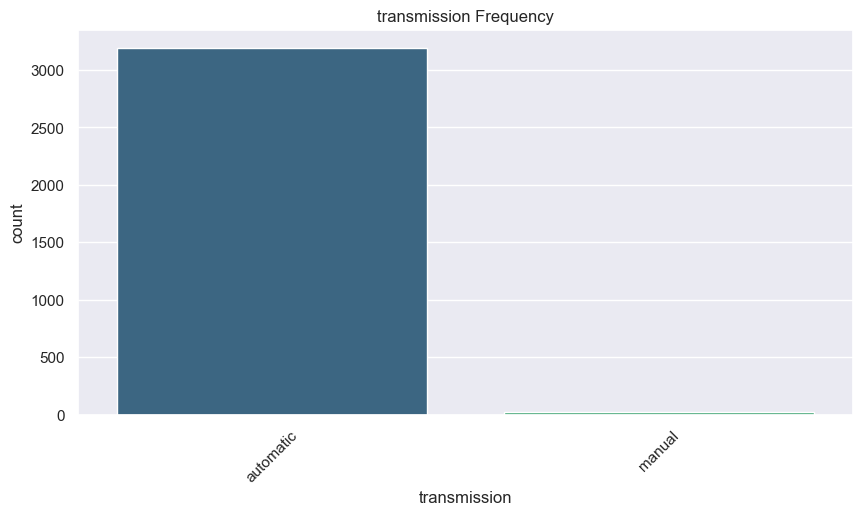

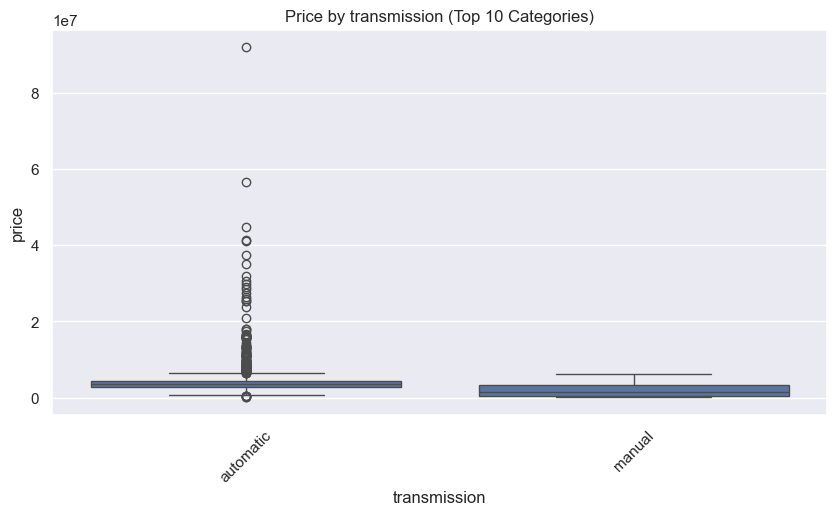

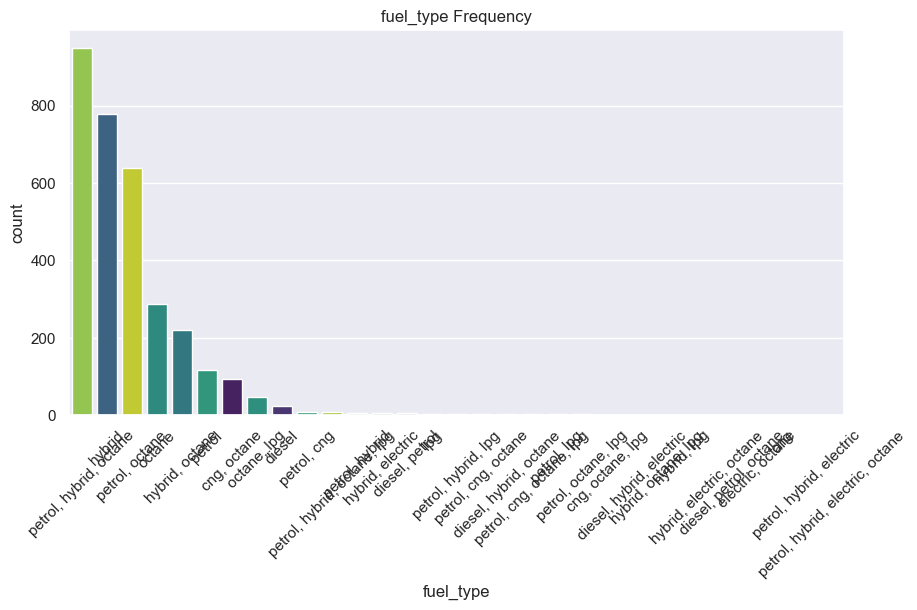

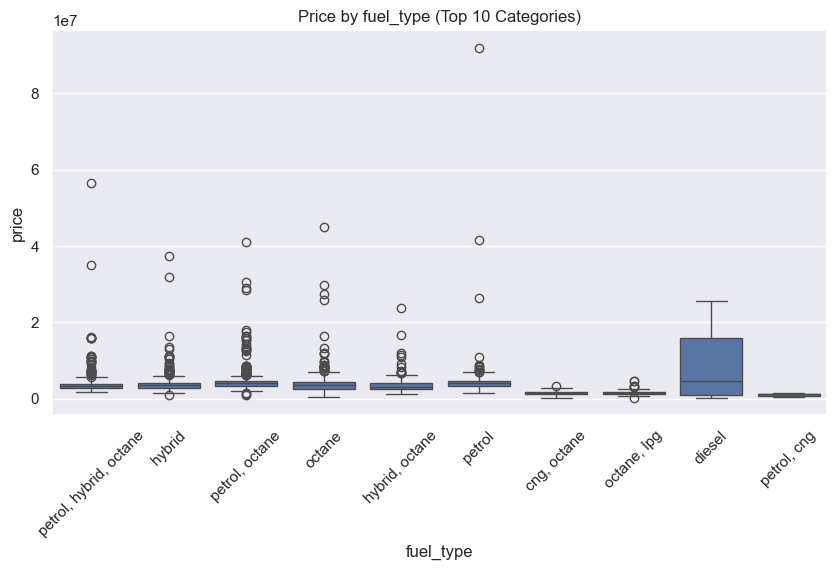

In [95]:
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    order = cars[col].value_counts().index
    sns.countplot(x=cars[col], order=order, palette="viridis", hue=cars[col], legend=False)
    plt.title(f"{col} Frequency")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10,5))
    top_categories = cars[col].value_counts().index[:10]
    sns.boxplot(x=cars[col], y=cars['price'], order=top_categories)
    plt.title(f"Price by {col} (Top 10 Categories)")
    plt.xticks(rotation=45)
    plt.show()

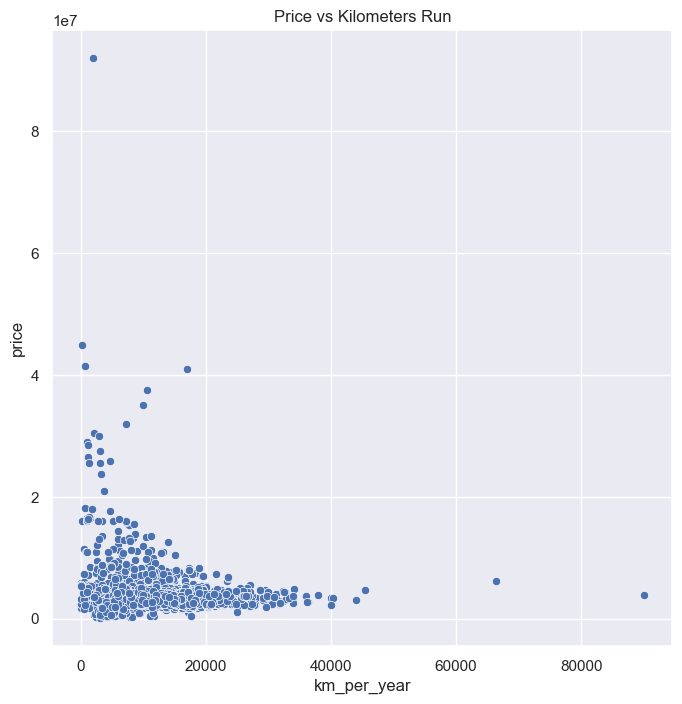

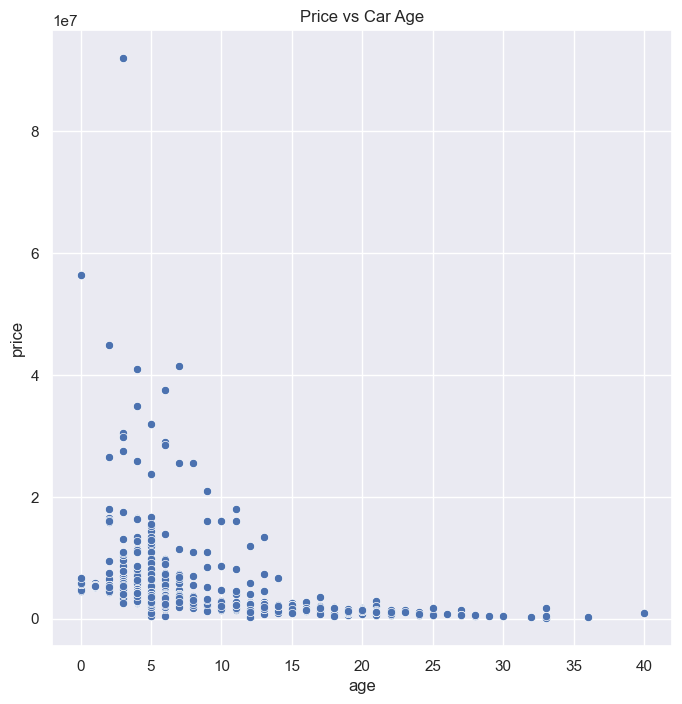

In [103]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='km_per_year', y='price', data=cars)
plt.title("Price vs Kilometers Run")
plt.show()

plt.figure(figsize=(8,8))
sns.scatterplot(x='age', y='price', data=cars)
plt.title("Price vs Car Age")
plt.show()

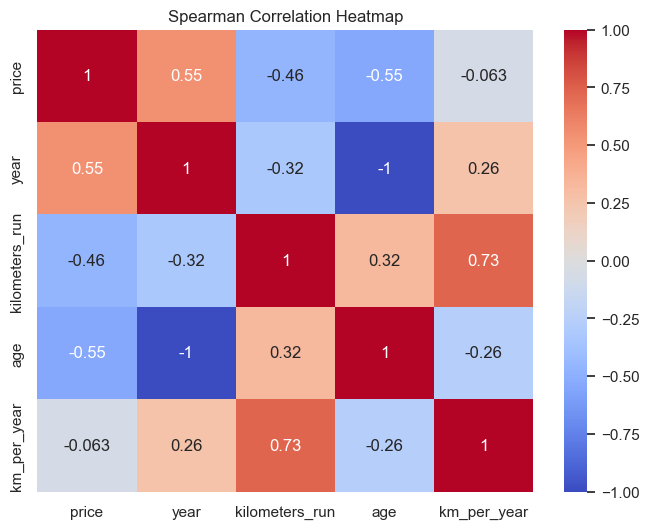

In [97]:
plt.figure(figsize=(8,6))
corr = cars[['price', 'year', 'kilometers_run', 'age', 'km_per_year']].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()

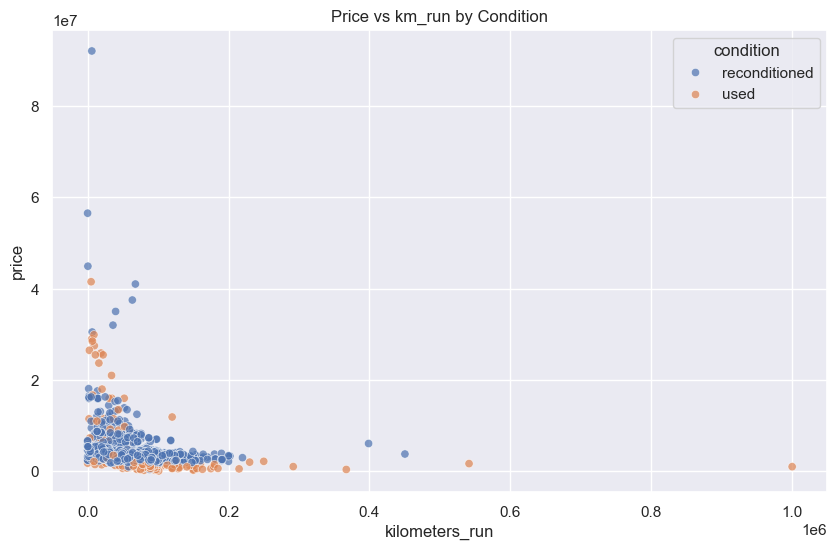

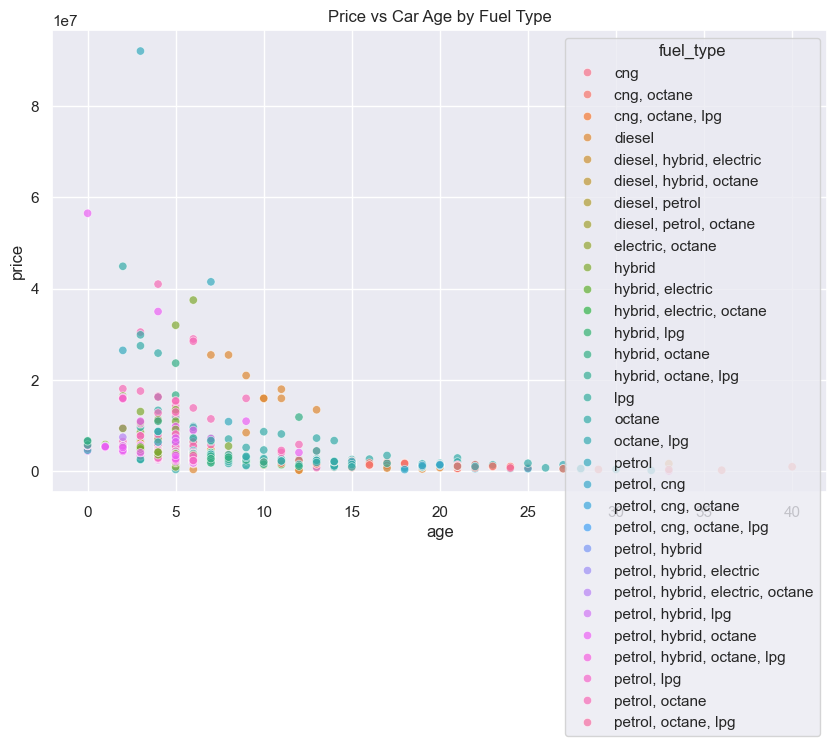

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='kilometers_run', y='price', hue='condition', data=cars, alpha=0.7)
plt.title("Price vs km_run by Condition")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='price', hue='fuel_type', data=cars, alpha=0.7)
plt.title("Price vs Car Age by Fuel Type")
plt.show()


In [104]:
cars.to_csv('../Data/cleaned_data_updated.csv')
cars.head()

,price,brand,model,year,condition,transmission,fuel_type,kilometers_run,age,km_per_year
0,2450000,toyota,fielder,2020,reconditioned,automatic,hybrid,86000,5,17200.000000
1,4500000,toyota,noah,2020,reconditioned,automatic,octane,68000,5,13600.000000
2,2750000,honda,cr-v,2012,used,automatic,octane,92000,13,7076.923077
3,1800000,toyota,hilux,2009,used,manual,diesel,1,16,0.062500
4,1350000,toyota,passo,2010,used,automatic,"octane, lpg",87369,15,5824.600000
